<a href="https://colab.research.google.com/github/sirsjosh/Computer-Vision/blob/main/green-screen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Color Threshold, Green Screen**

Import resources

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib
import numpy as np
import cv2

%matplotlib inline

Read in and display the image

In [4]:
# Read in the image
url = 'https://github.com/udacity/cd0360-Introduction-to-Computer-Vision/blob/main/1_1_Image_Representation/images/car_green_screen.jpg?raw=true'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()),dtype = np.uint8)
image = cv2.imdecode(arr, -1)

# Print out the type of image data and its dimensions (height, width, and color)
print(f'This image is: {type(image)}, with dimensions: {image.shape}')

This image is: <class 'numpy.ndarray'>, with dimensions: (450, 660, 3)


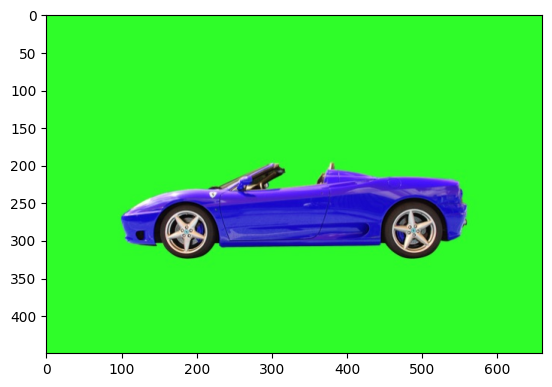

In [5]:
# Display the image
plt.imshow(image)

Define the color threshold

In [20]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,140,0])
upper_green = np.array([255,255,255])

Create a mask

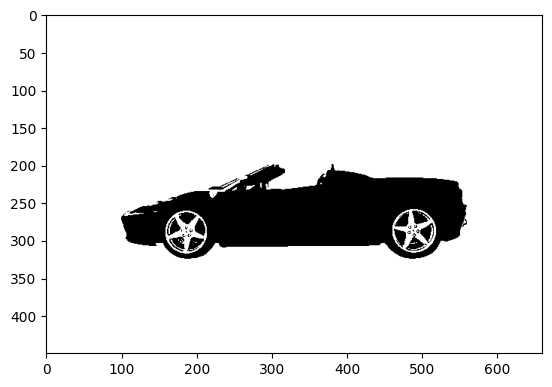

In [21]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

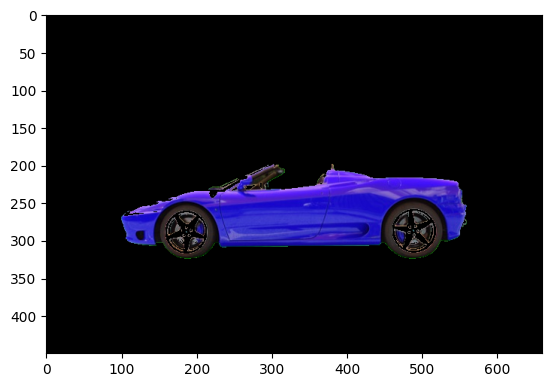

In [22]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

Mask and add a background image

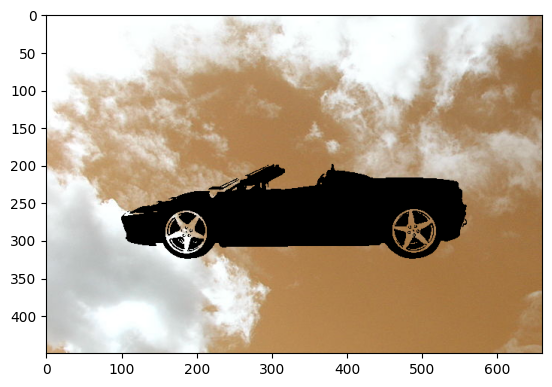

In [23]:
# Load in a background image, and convert it to RGB
# Read in the image
url = 'https://github.com/udacity/cd0360-Introduction-to-Computer-Vision/blob/main/1_1_Image_Representation/images/sky.jpg?raw=true'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()),dtype = np.uint8)
background_image = cv2.imdecode(arr, -1)

## TODO: Crop it or resize the background to be the right size (450x660)
cropped_background_image = background_image[0:450,0:660]

## TODO: Mask the cropped background so that the car area is blocked
# Hint mask the opposite area of the previous image
cropped_background_image[mask == 0] = [0, 0, 0]

## TODO: Display the background and make sure
plt.imshow(cropped_background_image)

Create a complete image

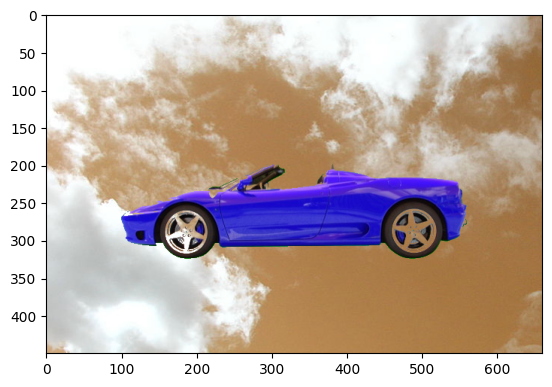

In [24]:
## TODO: Add the two images together to create a complete image!
complete_image = masked_image + cropped_background_image

plt.imshow(complete_image)